In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import datetime as dt

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
daily_load = "CYYZ_daily.txt"

# Read the international and Canadian GHE data files
daily_load_data = pd.read_csv(daily_load)

In [2]:
#function from fah to cel
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [3]:
# daily_load_data = daily_load_data.astype({"Date":}) 
daily_load_data["date time"] = pd.to_datetime(daily_load_data["Date"], infer_datetime_format=True)

In [4]:
daily_load_data["month"] = daily_load_data["date time"].dt.month
daily_load_data["year"] = daily_load_data["date time"].dt.year
                                              
daily_load_data_clean = daily_load_data.drop(["Source","HDDs","CDDs","Precipitation Water Equiv","Snowfall","Snow/Ice Depth"], axis=1)
daily_load_data_clean.head()

,Site4,Date,Max Temp,Min Temp,Avg Temp,date time,month,year
0,CYYZ,1/1/1971 0:00:00,20,2,11.0,1971-01-01,1,1971
1,CYYZ,1/2/1971 0:00:00,38,5,21.5,1971-01-02,1,1971
2,CYYZ,1/3/1971 0:00:00,35,29,32.0,1971-01-03,1,1971
3,CYYZ,1/4/1971 0:00:00,42,30,36.0,1971-01-04,1,1971
4,CYYZ,1/5/1971 0:00:00,32,18,25.0,1971-01-05,1,1971


In [5]:
pd.to_numeric(daily_load_data_clean["year"])
daily_load_data_clean.head()

,Site4,Date,Max Temp,Min Temp,Avg Temp,date time,month,year
0,CYYZ,1/1/1971 0:00:00,20,2,11.0,1971-01-01,1,1971
1,CYYZ,1/2/1971 0:00:00,38,5,21.5,1971-01-02,1,1971
2,CYYZ,1/3/1971 0:00:00,35,29,32.0,1971-01-03,1,1971
3,CYYZ,1/4/1971 0:00:00,42,30,36.0,1971-01-04,1,1971
4,CYYZ,1/5/1971 0:00:00,32,18,25.0,1971-01-05,1,1971


In [6]:
daily_load_data_clean.dtypes

Site4                object
Date                 object
Max Temp              int64
Min Temp              int64
Avg Temp            float64
date time    datetime64[ns]
month                 int64
year                  int64
dtype: object

In [7]:
daily_load_data_clean.count()

Site4        17842
Date         17842
Max Temp     17842
Min Temp     17842
Avg Temp     17842
date time    17842
month        17842
year         17842
dtype: int64

In [8]:
daily_load_data_clean.dtypes

Site4                object
Date                 object
Max Temp              int64
Min Temp              int64
Avg Temp            float64
date time    datetime64[ns]
month                 int64
year                  int64
dtype: object

In [11]:
yearly_df = daily_load_data_clean.groupby(by="year").mean().reset_index()

yearly_df.head()

,year,Max Temp,Min Temp,Avg Temp,month
0,1971,54.383562,35.213699,44.798630,6.526027
1,1972,52.122951,33.333333,42.728142,6.513661
2,1973,55.769863,37.068493,46.419178,6.526027
3,1974,53.906849,34.794521,44.350685,6.526027
4,1975,55.167123,36.775342,45.971233,6.526027


In [12]:
yearly_df["Max Temp C"] = ((yearly_df["Max Temp"]-32) * 5 / 9)
yearly_df["Min Temp C"] = ((yearly_df["Min Temp"]-32) * 5 / 9)
yearly_df["Avg Temp C"] = ((yearly_df["Avg Temp"]-32) * 5 / 9)

yearly_df.head()

,year,Max Temp,Min Temp,Avg Temp,month,Max Temp C,Min Temp C,Avg Temp C
0,1971,54.383562,35.213699,44.798630,6.526027,12.435312,1.785388,7.110350
1,1972,52.122951,33.333333,42.728142,6.513661,11.179417,0.740741,5.960079
2,1973,55.769863,37.068493,46.419178,6.526027,13.205479,2.815830,8.010654
3,1974,53.906849,34.794521,44.350685,6.526027,12.170472,1.552511,6.861492
4,1975,55.167123,36.775342,45.971233,6.526027,12.870624,2.652968,7.761796


Text(0.5, 0, 'Year')

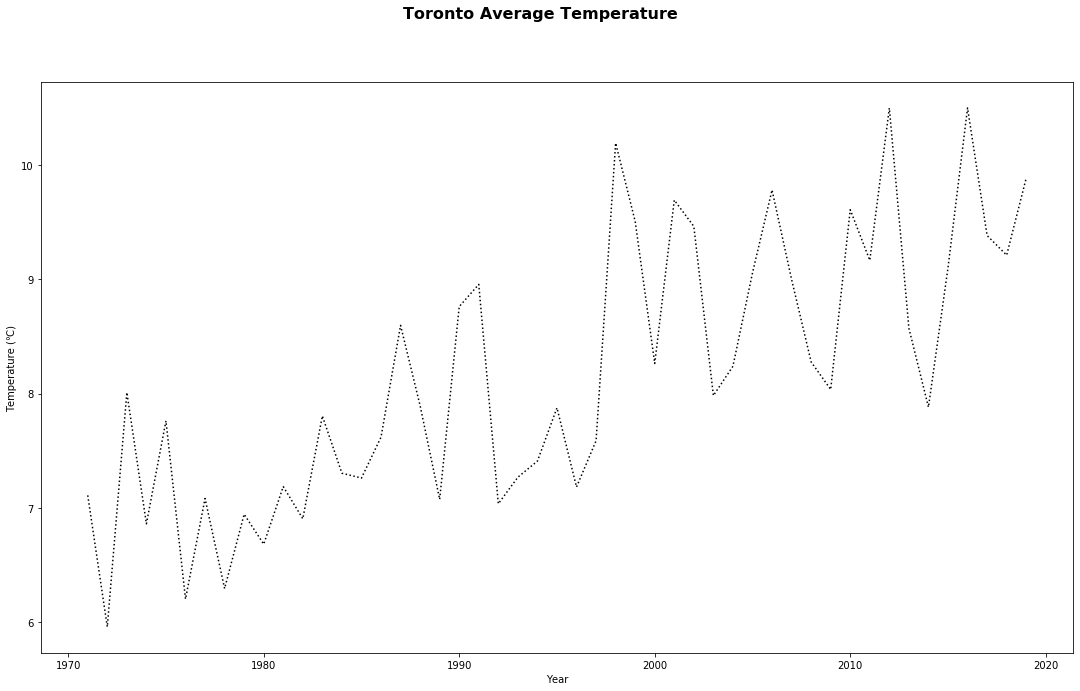

In [13]:
# Plot Toronto mean temperature data
fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Toronto Average Temperature", fontsize=16, fontweight="bold")

ax1.plot(yearly_df["year"], yearly_df["Avg Temp C"],color="black", linestyle = ":")

ax1.set_ylabel("Temperature (℃)")
ax1.set_xlabel("Year")

In [14]:
#1977 to 2007
yearly_df_refined = yearly_df.loc[yearly_df["year"]<2008,:]
yearly_df_refined = yearly_df.loc[yearly_df["year"]>=1977,:]
baseline = yearly_df_refined["Avg Temp C"].mean()
yearly_df_refined.head()

,year,Max Temp,Min Temp,Avg Temp,month,Max Temp C,Min Temp C,Avg Temp C
6,1977,53.863014,35.635616,44.749315,6.526027,12.146119,2.019787,7.082953
7,1978,52.961644,33.701370,43.331507,6.526027,11.645358,0.945205,6.295282
8,1979,53.589041,35.413699,44.501370,6.526027,11.993912,1.896499,6.945205
9,1980,52.989071,35.071038,44.030055,6.513661,11.660595,1.706132,6.683364
10,1981,53.887671,35.986301,44.936986,6.526027,12.159817,2.214612,7.187215


In [20]:
yearly_df_refined.head()

,year,Max Temp,Min Temp,Avg Temp,month,Max Temp C,Min Temp C,Avg Temp C,Difference
37,2008,55.144809,38.655738,46.900273,6.513661,12.858227,3.697632,8.277930,-0.048687
38,2009,54.871233,38.060274,46.465753,6.526027,12.706240,3.366819,8.036530,-0.290087
39,2010,57.501370,41.090411,49.295890,6.526027,14.167428,5.050228,9.608828,1.282211
40,2011,56.676712,40.323288,48.500000,6.526027,13.709285,4.624049,9.166667,0.840050
41,2012,59.390710,42.404372,50.897541,6.513661,15.217061,5.780206,10.498634,2.172017


In [16]:
baseline = yearly_df_refined["Avg Temp C"].mean()
baseline

8.326616962834166

In [17]:
yearly_df_refined["Difference"]= yearly_df_refined["Avg Temp C"]-baseline
yearly_df_refined.head()

,year,Max Temp,Min Temp,Avg Temp,month,Max Temp C,Min Temp C,Avg Temp C,Difference
6,1977,53.863014,35.635616,44.749315,6.526027,12.146119,2.019787,7.082953,-1.243664
7,1978,52.961644,33.701370,43.331507,6.526027,11.645358,0.945205,6.295282,-2.031335
8,1979,53.589041,35.413699,44.501370,6.526027,11.993912,1.896499,6.945205,-1.381411
9,1980,52.989071,35.071038,44.030055,6.513661,11.660595,1.706132,6.683364,-1.643253
10,1981,53.887671,35.986301,44.936986,6.526027,12.159817,2.214612,7.187215,-1.139402


In [18]:
yearly_df_refined = yearly_df.loc[yearly_df["year"]>=2008,:]
yearly_df_refined["Difference"]= yearly_df_refined["Avg Temp C"]-baseline
yearly_df_refined

,year,Max Temp,Min Temp,Avg Temp,month,Max Temp C,Min Temp C,Avg Temp C,Difference
37,2008,55.144809,38.655738,46.900273,6.513661,12.858227,3.697632,8.277930,-0.048687
38,2009,54.871233,38.060274,46.465753,6.526027,12.706240,3.366819,8.036530,-0.290087
39,2010,57.501370,41.090411,49.295890,6.526027,14.167428,5.050228,9.608828,1.282211
40,2011,56.676712,40.323288,48.500000,6.526027,13.709285,4.624049,9.166667,0.840050
41,2012,59.390710,42.404372,50.897541,6.513661,15.217061,5.780206,10.498634,2.172017
42,2013,54.991781,39.868493,47.430137,6.526027,12.773212,4.371385,8.572298,0.245681
43,2014,55.112329,37.263014,46.187671,6.526027,12.840183,2.923896,7.882040,-0.444577
44,2015,57.986301,38.778082,48.382192,6.526027,14.436834,3.765601,9.101218,0.774601
45,2016,60.327869,41.469945,50.898907,6.513661,15.737705,5.261081,10.499393,2.172776
46,2017,56.238356,41.542466,48.890411,6.526027,13.465753,5.301370,9.383562,1.056945


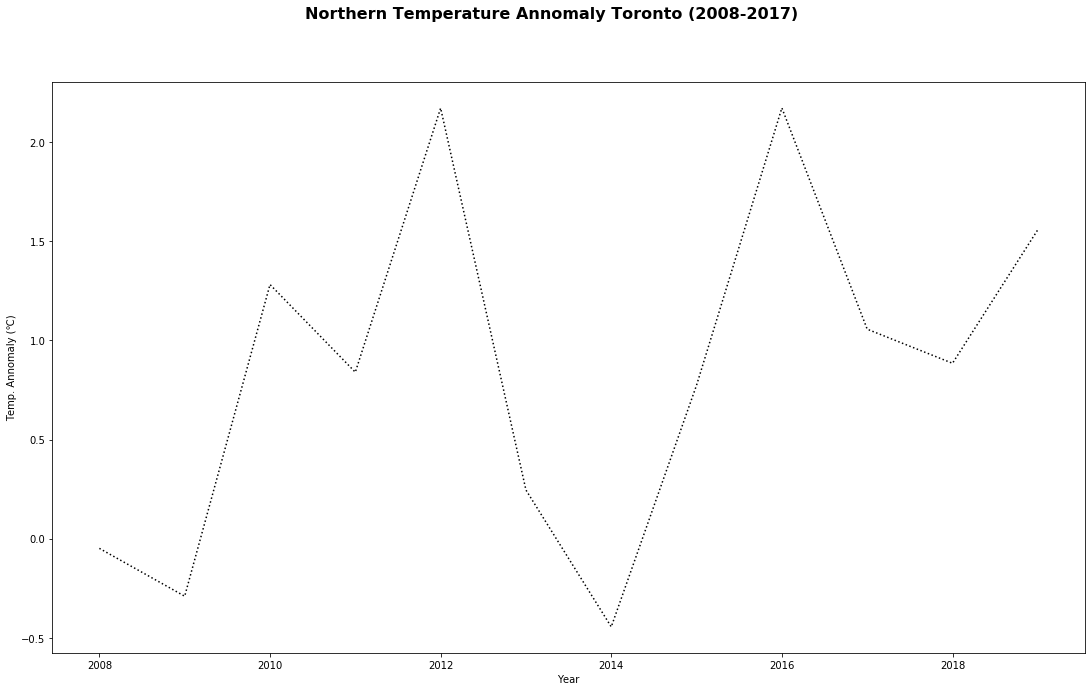

In [19]:
# Plot
fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Northern Temperature Annomaly Toronto (2008-2017)", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(yearly_df_refined["year"]), max(yearly_df_refined["year"]))
ax1.plot(yearly_df_refined["year"], yearly_df_refined["Difference"],color="black", linestyle = ":")

ax1.set_ylabel("Temp. Annomaly (℃)")
ax1.set_xlabel("Year")

# Save the plot
plt.savefig("Toronto_Temp_Annomaly.png")